In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import model_selection as ms
from sklearn import datasets, metrics, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from smrt import smrt_balance

In [2]:
seed = 42

In [125]:
# Generate the dataset
X, y = datasets.make_classification(n_classes=2, class_sep=2,
                                    weights=[.95, .05], n_informative=50,
                                    n_redundant=10, flip_y=0, n_features=100,
                                    n_clusters_per_class=4, n_samples=50000,
                                    random_state=seed)

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)

In [128]:
#fit on un-sampled dataset

In [129]:
rf = RandomForestClassifier(random_state=seed,n_jobs = -1)

In [130]:
rf.fit(X_train,y_train)
preds = rf.predict(X_test)
cohen_score = metrics.cohen_kappa_score(y_test, preds)
acc_score = metrics.accuracy_score(y_test, preds)
auc_score = metrics.roc_auc_score(y_test, preds)
avg_prec = metrics.average_precision_score(y_test, preds)

In [131]:
print(cohen_score)
print(acc_score)
print(auc_score)
print(avg_prec)

0.172831123342
0.955733333333
0.549557338023
0.564935634548


In [132]:
print(metrics.classification_report(y_test,preds))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98     14264
          1       0.99      0.10      0.18       736

avg / total       0.96      0.96      0.94     15000



In [133]:
balance_arr = np.arange(.1,1,.1)
cohen_scores = []
acc_scores = []
auc_scores = []
avg_prec_scores = []

for i in range(len(balance)):
    X_bal, y_bal = smrt_balance(X_train,y_train, seed=seed, shuffle=False, balance_ratio = balance_arr[i])
    rf.fit(X_bal,y_bal)
    preds = rf.predict(X_test)
    cohen_score = metrics.cohen_kappa_score(y_test,preds)
    acc_score = metrics.accuracy_score(y_test, preds)
    auc_score = metrics.roc_auc_score(y_test, preds)
    avg_prec = metrics.average_precision_score(y_test, preds)
    cohen_scores.append(cohen_score)
    acc_scores.append(acc_score) 
    auc_scores.append(auc_score)
    avg_prec_scores.append(avg_prec)

C:\Users\Jason\Anaconda2\envs\py35\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


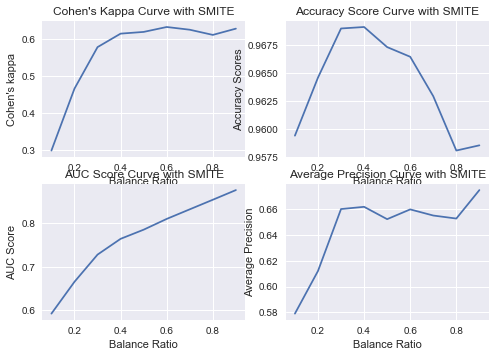

In [134]:
plt.figure(1)

plt.subplot(221)
plt.title("Cohen's Kappa Curve with SMITE")
plt.xlabel("Balance Ratio")
plt.ylabel("Cohen's kappa")
plt.plot(balance_arr, cohen_scores)
plt.legend(loc="best")
#f.show()

plt.subplot(222)
plt.title("Accuracy Score Curve with SMITE")
plt.xlabel("Balance Ratio")
plt.ylabel("Accuracy Scores")
plt.plot(balance_arr, acc_scores)
plt.legend(loc="best")

plt.subplot(223)
plt.title("AUC Score Curve with SMITE")
plt.xlabel("Balance Ratio")
plt.ylabel("AUC Score")
plt.plot(balance_arr, auc_scores)
plt.legend(loc="best")

plt.subplot(224)
plt.title("Average Precision Curve with SMITE")
plt.xlabel("Balance Ratio")
plt.ylabel("Average Precision")
plt.plot(balance_arr, avg_prec_scores)
plt.legend(loc="best")

plt.show()